<a href="https://colab.research.google.com/github/wisrovi/RedesNeuronales/blob/master/07MAIR-WilliamSteveRodriguezVillamizar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliografia

In [0]:
#urlArchivos = "https://drive.google.com/drive/folders/1w2w5dAF269C646RBwwU33YLNUG4JRfh9?usp=sharing"

In [0]:
#!pip install tensorflow==2.0.0-alpha0

In [0]:
#https://github.com/jbagnato/machine-learning
#https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python#cnn
#https://www.datacamp.com/community/blog/keras-cheat-sheet

# Importar Librerias

In [1]:
#importo las librerias que se van a necesitar
import pickle
import matplotlib.pyplot as plt
import numpy as np

from keras import models
from keras import layers

from sklearn.model_selection import train_test_split

from keras.utils import to_categorical #para que las salidas queden parametrizadas en binario

from sklearn.metrics import classification_report #para ver parametros 

from keras.applications.inception_v3 import decode_predictions #para ver varios items de prediccion

#para autoescalar la imagen al tamaño requerido por la red a reentrenar
from keras.applications.inception_v3 import preprocess_input


# Para las librerias para la red neuronal
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


# Conexion con Google y Drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
###################################################################################################
BASE_FOLDER = '/content/gdrive/My Drive/Master IA/Redes Neuronales/'
###################################################################################################

In [0]:
#le indicamos al colaboratory que las importaciones de librerias propias se haran tambien desde el directorio base
import sys
sys.path.append(BASE_FOLDER)

# Importar Librerias propias

In [0]:
from ModeloExterno import ModeloExterno

# Funciones

In [0]:
#Algunas funciones utiles
def plot_image(img, title=""):
    #plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.title(title)
    #plt.axis('off')
    plt.show()

def convertLabelsToNumbers(y_train):
    # Transformando las labels de texto a valores numéricos
    y = np.unique(y_train)
    mapping = { key : value for key,value in zip(y,range(len(y)))}
    processed_y = np.array([mapping[i] for i in y_train])
    print(len(mapping))
    return processed_y

def DividirDatos_Train_Test_Predic(x, y, porcentaje=0.33, randomDiv=52):
    # dividir los datos entre training, test y predic
    X_train, X_test, y_train, y_test = train_test_split(
        x_train_all, processed_y, 
        test_size=porcentaje, 
        random_state=randomDiv)

    X_test, X_predic, y_test, y_predic = train_test_split(
        X_test, y_test, 
        test_size=porcentaje, 
        random_state=randomDiv)
    
    #Hacemos el One-hot Encoding
    train_Y_one_hot = to_categorical(y_train)
    test_Y_one_hot = to_categorical(y_test)
    predic_Y_one_hot = to_categorical(y_predic)

    return (X_train, train_Y_one_hot), (X_test, test_Y_one_hot), (X_predic, predic_Y_one_hot)

def plot_history(history):
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['acc'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

def plot_pred(pred):
    plt.figure(figsize=(8, 2))
    classes = [c[1] for c in pred]
    probas = [c[2] for c in pred]
    y_pos = np.arange(len(classes))
    plt.barh(y_pos, probas, align='center')
    plt.yticks(y_pos, classes)
    plt.gca().invert_yaxis()
    plt.xlabel('Probability')
    plt.xlim(0, 1)

# Importar Dataseet y clases

In [8]:
#Cargo los archivos de clases y las imagenes
with open(BASE_FOLDER+"pickle_all_images_df-002.pickle", "rb") as input_file:
    x_train_all = pickle.load(input_file)
with open(BASE_FOLDER+"pickle_all_classes.pickle", "rb") as input_file:
    y_train_all = pickle.load(input_file)

number_of_classes = len(y_train_all)

print("Entradas: ",x_train_all.shape)
print("Salidas: ", number_of_classes)

Entradas:  (9145, 128, 128, 3)
Salidas:  9145


In [0]:
#show image
#plot_image(x_train_all[imagen])

In [9]:
processed_y = convertLabelsToNumbers(y_train_all)

102


In [0]:
imagen = 250
#print(processed_y[imagen], y_train_all[imagen])

In [10]:
classes = np.unique(processed_y)
nClasses = len(classes)
print("Numero de clases diferenes:", nClasses)
print()

(X_train, y_train), (X_test, y_test), (X_predic, y_predic) = DividirDatos_Train_Test_Predic(x_train_all, processed_y)

print("Training (66.98%)") 
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print() 
print("Test (22.1%)") 
print("X_test", X_test.shape)
print("y_test", y_test.shape)
print()
print("Predict (10.89%)") 
print("X_predic", X_predic.shape)
print("y_predic", y_predic.shape)

print()
if y_predic.shape[1] == y_test.shape[1] and y_test.shape[1] == y_train.shape[1]:
    print("Distribución correcta")
else:
    print("Fallo en la distribución")

Numero de clases diferenes: 102

Training (66.98%)
X_train (6127, 128, 128, 3)
y_train (6127, 102)

Test (22.1%)
X_test (2022, 128, 128, 3)
y_test (2022, 102)

Predict (10.89%)
X_predic (996, 128, 128, 3)
y_predic (996, 102)

Distribución correcta


In [11]:
#Creamos el Set de Entrenamiento y Validación
#divido los datos de entrenamiento en dos, un 80% para el entrenamiento y otro 20% para validacion
train_X,valid_X,train_label,valid_label = train_test_split(
    X_train, y_train, 
    test_size=0.1, random_state=43)

print(train_X.shape)
print(train_label.shape)
print()
print(valid_X.shape)
print(valid_label.shape)

(5514, 128, 128, 3)
(5514, 102)

(613, 128, 128, 3)
(613, 102)


# Nueva Red Neuronal

## Red Neuronal

In [0]:
modelExtern = ModeloExterno(nombreModelo="wisrovi", rutaBase=BASE_FOLDER)

In [0]:
print("********** Modelo *********")

new_model = Sequential()
new_model.add(
    Conv2D(32,
           kernel_size=(3, 3),
           activation='relu',
           padding='same',
           input_shape=(128,128,3)
           )
    )
new_model.add(Dense(128, activation='relu'))
new_model.add(MaxPooling2D((2, 2),padding='same'))
new_model.add(Dropout(0.5))

new_model.add(Dense(120, activation='relu'))
new_model.add(Dropout(0.25)) #apagar un 25% de manera aleatoria para reducir la cantidad de parametros
new_model.add(Dense(64, activation='relu'))
new_model.add(Dense(64, activation='relu'))
new_model.add(Flatten()) #para aplanar todas las capas
new_model.add(Dense(64, activation='relu'))
new_model.add(Dense(64, activation='relu'))
new_model.add(Dense(87, activation='relu'))
new_model.add(Dropout(0.5)) #apagar un 50% de manera aleatoria para reducir la cantidad de parametros
new_model.add(Dense(nClasses, activation='softmax')) #Genero la capa final con la cantidad de neuronas segun la cantidad de opciones de clasificacion

#new_model.summary()

new_model.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

modelExtern.GuardarModelo(new_model)

********** Modelo *********
Modelo guardado!


True

## Entrenar el modelo



Entrenamiento 1
Train on 5514 samples, validate on 613 samples
Epoch 1/25
5514/5514 [==============================] - 9s 2ms/step - loss: 4.3170 - acc: 0.1037 - val_loss: 3.5786 - val_acc: 0.2692
Epoch 2/25
5514/5514 [==============================] - 8s 2ms/step - loss: 3.6075 - acc: 0.2554 - val_loss: 3.5482 - val_acc: 0.2936
Epoch 3/25
5514/5514 [==============================] - 8s 2ms/step - loss: 3.3036 - acc: 0.3083 - val_loss: 3.0802 - val_acc: 0.3344
Epoch 4/25
5514/5514 [==============================] - 8s 2ms/step - loss: 3.1050 - acc: 0.3283 - val_loss: 3.0204 - val_acc: 0.3556
Epoch 5/25
5514/5514 [==============================] - 8s 2ms/step - loss: 2.9921 - acc: 0.3469 - val_loss: 2.9129 - val_acc: 0.3638
Epoch 6/25
5514/5514 [==============================] - 8s 2ms/step - loss: 2.8831 - acc: 0.3540 - val_loss: 2.8837 - val_acc: 0.3719
Epoch 7/25
5514/5514 [==============================] - 8s 2ms/step - loss: 2.7844 - acc: 0.3640 - val_loss: 2.8529 - val_acc: 0.38

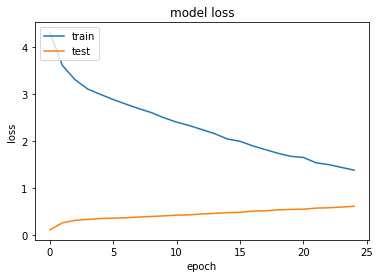

Pesos Guardados!
2022/2022 [==============================] - 1s 581us/step
Test loss: 4.191599527051493
Test accuracy: 0.3654797230759667
***************



Entrenamiento 2
Train on 5514 samples, validate on 613 samples
Epoch 1/25
5514/5514 [==============================] - 8s 2ms/step - loss: 1.3338 - acc: 0.6088 - val_loss: 4.5741 - val_acc: 0.3605
Epoch 2/25
5514/5514 [==============================] - 8s 2ms/step - loss: 1.2550 - acc: 0.6279 - val_loss: 4.5717 - val_acc: 0.3817
Epoch 3/25
5514/5514 [==============================] - 8s 2ms/step - loss: 1.1980 - acc: 0.6420 - val_loss: 4.8991 - val_acc: 0.3589
Epoch 4/25
5514/5514 [==============================] - 8s 2ms/step - loss: 1.1872 - acc: 0.6473 - val_loss: 4.8912 - val_acc: 0.3605
Epoch 5/25
5514/5514 [==============================] - 8s 2ms/step - loss: 1.1546 - acc: 0.6605 - val_loss: 4.9582 - val_acc: 0.3622
Epoch 6/25
5514/5514 [==============================] - 8s 2ms/step - loss: 1.1341 - acc: 0.6636 - val_loss: 

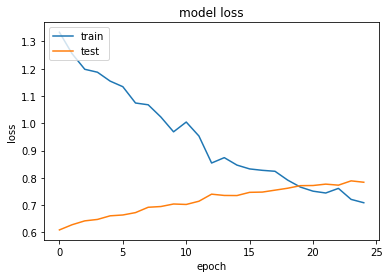

Pesos Guardados!
2022/2022 [==============================] - 1s 592us/step
Test loss: 6.271547363254838
Test accuracy: 0.3506429278237412
***************



Entrenamiento 3
Train on 5514 samples, validate on 613 samples
Epoch 1/25
5514/5514 [==============================] - 8s 2ms/step - loss: 0.6984 - acc: 0.7904 - val_loss: 6.5906 - val_acc: 0.3638
Epoch 2/25
5514/5514 [==============================] - 8s 2ms/step - loss: 0.6478 - acc: 0.8000 - val_loss: 6.4997 - val_acc: 0.3605
Epoch 3/25
5514/5514 [==============================] - 8s 2ms/step - loss: 0.6700 - acc: 0.8020 - val_loss: 6.9343 - val_acc: 0.3622
Epoch 4/25
5514/5514 [==============================] - 8s 2ms/step - loss: 0.6691 - acc: 0.8000 - val_loss: 6.6719 - val_acc: 0.3670
Epoch 5/25
5514/5514 [==============================] - 8s 2ms/step - loss: 0.6216 - acc: 0.8099 - val_loss: 6.7934 - val_acc: 0.3507
Epoch 6/25
5514/5514 [==============================] - 8s 2ms/step - loss: 0.6028 - acc: 0.8215 - val_loss: 

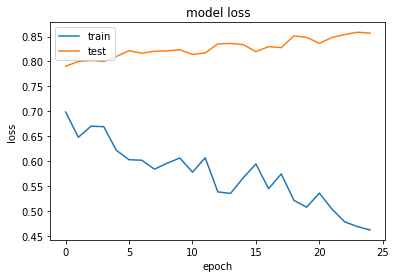

Pesos Guardados!
2022/2022 [==============================] - 1s 582us/step
Test loss: 7.676006161494495
Test accuracy: 0.34520276956459184
***************



Entrenamiento 4
Train on 5514 samples, validate on 613 samples
Epoch 1/25
5514/5514 [==============================] - 8s 2ms/step - loss: 0.4781 - acc: 0.8576 - val_loss: 7.4386 - val_acc: 0.3540
Epoch 2/25
5514/5514 [==============================] - 8s 2ms/step - loss: 0.4905 - acc: 0.8613 - val_loss: 7.4216 - val_acc: 0.3589
Epoch 3/25
5514/5514 [==============================] - 8s 2ms/step - loss: 0.4715 - acc: 0.8653 - val_loss: 7.3933 - val_acc: 0.3605
Epoch 4/25
5514/5514 [==============================] - 8s 2ms/step - loss: 0.4909 - acc: 0.8596 - val_loss: 7.4937 - val_acc: 0.3589
Epoch 5/25
5514/5514 [==============================] - 8s 2ms/step - loss: 0.4540 - acc: 0.8645 - val_loss: 7.5117 - val_acc: 0.3573
Epoch 6/25
5514/5514 [==============================] - 8s 2ms/step - loss: 0.4434 - acc: 0.8678 - val_loss:

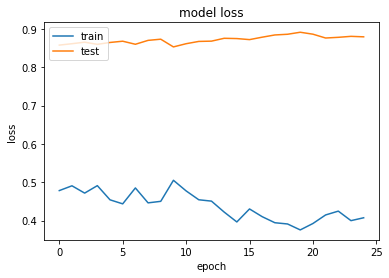

Pesos Guardados!
2022/2022 [==============================] - 1s 590us/step
Test loss: 7.802718506368756
Test accuracy: 0.34817012861503693
***************



Entrenamiento 5
Train on 5514 samples, validate on 613 samples
Epoch 1/25
5514/5514 [==============================] - 8s 2ms/step - loss: 0.3862 - acc: 0.8859 - val_loss: 7.7077 - val_acc: 0.3589
Epoch 2/25
5514/5514 [==============================] - 8s 2ms/step - loss: 0.4071 - acc: 0.8828 - val_loss: 7.6350 - val_acc: 0.3442
Epoch 3/25
5514/5514 [==============================] - 8s 2ms/step - loss: 0.4161 - acc: 0.8789 - val_loss: 7.7069 - val_acc: 0.3475
Epoch 4/25
5514/5514 [==============================] - 8s 2ms/step - loss: 0.3817 - acc: 0.8868 - val_loss: 7.9479 - val_acc: 0.3540
Epoch 5/25
5514/5514 [==============================] - 8s 2ms/step - loss: 0.3885 - acc: 0.8789 - val_loss: 7.7569 - val_acc: 0.3507
Epoch 6/25
5514/5514 [==============================] - 8s 2ms/step - loss: 0.3491 - acc: 0.8984 - val_loss:

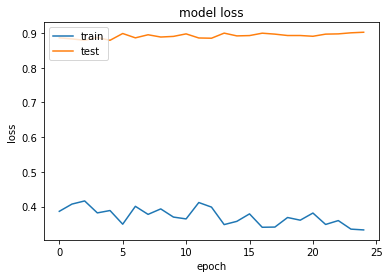

Pesos Guardados!
2022/2022 [==============================] - 1s 578us/step
Test loss: 8.202442262575959
Test accuracy: 0.34520276956459184
***************



Entrenamiento 6
Train on 5514 samples, validate on 613 samples
Epoch 1/25
5514/5514 [==============================] - 8s 2ms/step - loss: 0.3506 - acc: 0.8950 - val_loss: 7.7823 - val_acc: 0.3556
Epoch 2/25
5514/5514 [==============================] - 8s 2ms/step - loss: 0.3350 - acc: 0.9006 - val_loss: 8.0022 - val_acc: 0.3524
Epoch 3/25
5514/5514 [==============================] - 8s 2ms/step - loss: 0.3125 - acc: 0.9077 - val_loss: 8.2633 - val_acc: 0.3556
Epoch 4/25
5514/5514 [==============================] - 8s 2ms/step - loss: 0.3322 - acc: 0.9022 - val_loss: 8.2615 - val_acc: 0.3605
Epoch 5/25
5514/5514 [==============================] - 8s 2ms/step - loss: 0.3095 - acc: 0.9131 - val_loss: 8.2484 - val_acc: 0.3491
Epoch 6/25
5514/5514 [==============================] - 8s 2ms/step - loss: 0.3396 - acc: 0.8997 - val_loss:

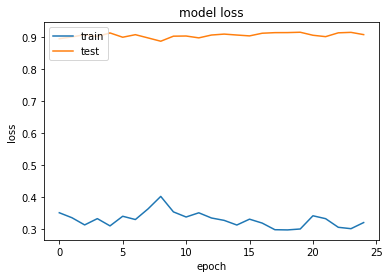

Pesos Guardados!
2022/2022 [==============================] - 1s 565us/step
Test loss: 8.366340355160919
Test accuracy: 0.34520276956459184
***************



Entrenamiento 7
Train on 5514 samples, validate on 613 samples
Epoch 1/25
5514/5514 [==============================] - 8s 2ms/step - loss: 0.2929 - acc: 0.9175 - val_loss: 8.3523 - val_acc: 0.3573
Epoch 2/25
5514/5514 [==============================] - 8s 2ms/step - loss: 0.2906 - acc: 0.9139 - val_loss: 8.2971 - val_acc: 0.3524
Epoch 3/25
5514/5514 [==============================] - 8s 2ms/step - loss: 0.3229 - acc: 0.9088 - val_loss: 8.2632 - val_acc: 0.3507
Epoch 4/25
5514/5514 [==============================] - 8s 2ms/step - loss: 0.3002 - acc: 0.9155 - val_loss: 8.2338 - val_acc: 0.3524
Epoch 5/25
5514/5514 [==============================] - 8s 2ms/step - loss: 0.3141 - acc: 0.9126 - val_loss: 8.1412 - val_acc: 0.3638
Epoch 6/25
5514/5514 [==============================] - 8s 2ms/step - loss: 0.3018 - acc: 0.9113 - val_loss:

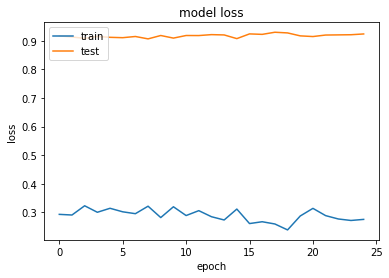

Pesos Guardados!
2022/2022 [==============================] - 1s 586us/step
Test loss: 8.486599907087408
Test accuracy: 0.35014836798200033
***************



Entrenamiento 8
Train on 5514 samples, validate on 613 samples
Epoch 1/25
5514/5514 [==============================] - 8s 2ms/step - loss: 0.2764 - acc: 0.9267 - val_loss: 8.4111 - val_acc: 0.3540
Epoch 2/25
5514/5514 [==============================] - 8s 2ms/step - loss: 0.2757 - acc: 0.9253 - val_loss: 8.4860 - val_acc: 0.3540
Epoch 3/25
5514/5514 [==============================] - 8s 1ms/step - loss: 0.2842 - acc: 0.9222 - val_loss: 8.3501 - val_acc: 0.3589
Epoch 4/25
5514/5514 [==============================] - 8s 2ms/step - loss: 0.2967 - acc: 0.9211 - val_loss: 8.0969 - val_acc: 0.3475
Epoch 5/25
5514/5514 [==============================] - 8s 1ms/step - loss: 0.3129 - acc: 0.9135 - val_loss: 8.2850 - val_acc: 0.3605
Epoch 6/25
5514/5514 [==============================] - 8s 2ms/step - loss: 0.2667 - acc: 0.9224 - val_loss:

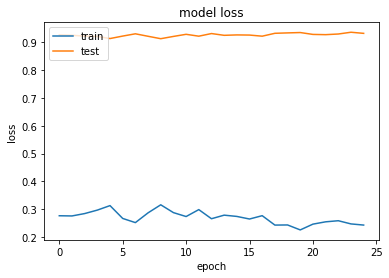

Pesos Guardados!
2022/2022 [==============================] - 1s 581us/step
Test loss: 8.703058077720694
Test accuracy: 0.344708209722851
***************



Entrenamiento 9
Train on 5514 samples, validate on 613 samples
Epoch 1/25
5514/5514 [==============================] - 8s 2ms/step - loss: 0.2536 - acc: 0.9325 - val_loss: 8.4877 - val_acc: 0.3524
Epoch 2/25
5514/5514 [==============================] - 8s 2ms/step - loss: 0.2664 - acc: 0.9240 - val_loss: 8.3657 - val_acc: 0.3556
Epoch 3/25
5514/5514 [==============================] - 8s 1ms/step - loss: 0.2641 - acc: 0.9271 - val_loss: 8.4258 - val_acc: 0.3605
Epoch 4/25
5514/5514 [==============================] - 8s 2ms/step - loss: 0.2398 - acc: 0.9325 - val_loss: 8.5365 - val_acc: 0.3540
Epoch 5/25
5514/5514 [==============================] - 8s 2ms/step - loss: 0.2292 - acc: 0.9373 - val_loss: 8.5610 - val_acc: 0.3638
Epoch 6/25
5514/5514 [==============================] - 8s 1ms/step - loss: 0.2264 - acc: 0.9345 - val_loss: 8

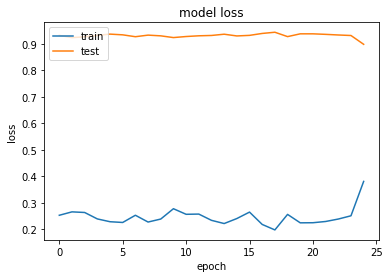

Pesos Guardados!
2022/2022 [==============================] - 1s 605us/step
Test loss: 8.333050862735858
Test accuracy: 0.3476755687732961
***************



Entrenamiento 10
Train on 5514 samples, validate on 613 samples
Epoch 1/25
5514/5514 [==============================] - 8s 2ms/step - loss: 0.2750 - acc: 0.9258 - val_loss: 8.3343 - val_acc: 0.3719
Epoch 2/25
5514/5514 [==============================] - 8s 2ms/step - loss: 0.2348 - acc: 0.9347 - val_loss: 8.2139 - val_acc: 0.3573
Epoch 3/25
5514/5514 [==============================] - 8s 2ms/step - loss: 0.2124 - acc: 0.9382 - val_loss: 8.5015 - val_acc: 0.3475
Epoch 4/25
5514/5514 [==============================] - 8s 2ms/step - loss: 0.2097 - acc: 0.9407 - val_loss: 8.4643 - val_acc: 0.3622
Epoch 5/25
5514/5514 [==============================] - 8s 1ms/step - loss: 0.1924 - acc: 0.9431 - val_loss: 8.6533 - val_acc: 0.3409
Epoch 6/25
5514/5514 [==============================] - 8s 1ms/step - loss: 0.1969 - acc: 0.9418 - val_loss:

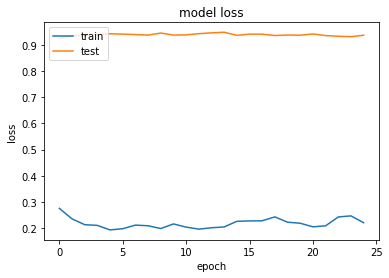

Pesos Guardados!
2022/2022 [==============================] - 1s 586us/step
Test loss: 8.845816824485711
Test accuracy: 0.35014836795252224
***************



In [0]:
#Entreno el modelo

#Al final de cada entrenamiento guardo los mejores pesos
numeroEntrenamientos = 10 

#ciclos en los cuales evaluo los datos de entrenamiento para hallar los mejores pesos
numeroEpocas = 25

for i in range(numeroEntrenamientos):     
    print()   
    print()
    print("Entrenamiento " + str(i + 1))

    history = new_model.fit(
        train_X, train_label, 
        batch_size=64, # cantidad de imágenes que se toman a la vez en memoria
        epochs=numeroEpocas, 
        verbose=1,
        validation_data=(valid_X, valid_label)
        )
        
    plot_history(history)
    modelExtern.GuardarPesosModelo()
    test_eval = new_model.evaluate(X_test, y_test, verbose=1)
    print('Test loss:', test_eval[0])
    print('Test accuracy:', test_eval[1])
    print("***************")    
    print()

In [0]:
#valido el modelo
test_eval = new_model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

2022/2022 [==============================] - 1s 592us/step
Test loss: 8.098143258269298
Test accuracy: 0.37883283880296964


In [0]:
modelExtern.GuardarPesosModelo()

Pesos Guardados!


True

## Cargar Modelo Red Neuronal Guardado

In [0]:
modeloCargado = modelExtern.CargarModeloGuardado(True)

Lectura del Json del modelo correcta
<class 'str'>
Modelo Cargado!
Pesos Cargados!
Modelo compilado!


In [0]:
#valido el modelo
test_eval = modeloCargado.evaluate(X_predic, y_predic, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

996/996 [==============================] - 1s 762us/step
Test loss: 8.765370129581436
Test accuracy: 0.34036144578313254


# Reentrenar un modelo de ImageNet

## Cargar Modelo ImageNet

In [12]:
# VGG16, VGG19, ResNet50, 
#Xception, InceptionV3, InceptionResNetV2, 
#MobileNetV2, DenseNet, RasNet


#https://www.learnopencv.com/keras-tutorial-fine-tuning-using-pre-trained-models/

from keras.applications import VGG16 
conv_base = VGG16(weights='imagenet',
                 include_top=False, # Si se deben incluir o no las capas de salida originales del modelo
                 input_shape=(128,128,3))

congelarTodoModeloImagenet = False
if congelarTodoModeloImagenet:
  conv_base.trainable = False
else:
  # Freeze the layers except the last 4 layers
  cantidadCapasFinalesDescongelar = 4
  for layer in conv_base.layers[:-cantidadCapasFinalesDescongelar]:
      layer.trainable = False
      pass

  # Check the trainable status of the individual layers
  for layer in conv_base.layers:
      pass
      print(layer, layer.trainable)

conv_base.summary()





58892288/58889256 [==============================] - 3s 0us/step






<keras.engine.input_layer.InputLayer object at 0x7fb087fabd30> False
<keras.layers.convolutional.Conv2D object at 0x7fb08787b4e0> False
<keras.layers.convolutional.Conv2D object at 0x7fb08787b668> False
<keras.layers.pooling.MaxPooling2D object at 0x7fb087864f28> False
<keras.layers.convolutional.Conv2D object at 0x7fb08781ab00> False
<keras.layers.convolutional.Conv2D object at 0x7fb087821400> False
<keras.layers.pooling.MaxPooling2D object at 0x7fb087826208> False
<keras.layers.convolutional.Conv2D object at 0x7fb0878297b8> False
<keras.layers.convolutional.Conv2D object at 0x7fb087834908> False
<keras.layers.convolutional.Conv2D object at 0x7fb087838668> False
<keras.layers.pooling.MaxPooling2D object at 0x7fb0877c55c0> False
<keras.layers.convolutional.Conv2D object at 0x7fb0877cc518> False
<keras.layers.convolutional.Conv2D object at 0x7fb0877d2828> False
<keras.layers.convolutional.Conv2D object at 0x7fb08

## Crear nuestro modelo e incluirle el modelo de imageNet

In [0]:
modeloTrasnferenciaConocimiento = ModeloExterno(nombreModelo="transfer-wisrovi", rutaBase=BASE_FOLDER)

In [21]:
pre_trained_model = models.Sequential()
pre_trained_model.add(conv_base)

#para aplanar todas las capas
#esto se hace debido a que el modelo de VG16 nos da 4 dimensiones de salida, y con esto reducimos las dimensiones a dos: numero datos, numero clases
pre_trained_model.add(Flatten()) 

# conectarlo a nueva parte densa
# Genero la capa final con la cantidad de neuronas segun la cantidad de opciones de clasificacion
pre_trained_model.add(Dense(nClasses, activation='softmax')) 

pre_trained_model.summary()

# compilar el modelo
pre_trained_model.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

modeloTrasnferenciaConocimiento.GuardarModelo(pre_trained_model)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 102)               835686    
Total params: 15,550,374
Trainable params: 7,915,110
Non-trainable params: 7,635,264
_________________________________________________________________
Modelo guardado!


True

## Entrenar Modelo Con conocimiento Transferido

Int:  (5514, 128, 128, 3)
Out:  (5514, 102)


Entrenamiento 1
Train on 5514 samples, validate on 613 samples
Epoch 1/10
5514/5514 [==============================] - 21s 4ms/step - loss: 0.5351 - acc: 0.8466 - val_loss: 1.0688 - val_acc: 0.7471
Epoch 2/10
5514/5514 [==============================] - 21s 4ms/step - loss: 0.3330 - acc: 0.8999 - val_loss: 1.1818 - val_acc: 0.7455
Epoch 3/10
5514/5514 [==============================] - 21s 4ms/step - loss: 0.2109 - acc: 0.9380 - val_loss: 1.1534 - val_acc: 0.7471
Epoch 4/10
5514/5514 [==============================] - 21s 4ms/step - loss: 0.1779 - acc: 0.9496 - val_loss: 1.2882 - val_acc: 0.7406
Epoch 5/10
5514/5514 [==============================] - 21s 4ms/step - loss: 0.1657 - acc: 0.9530 - val_loss: 1.2785 - val_acc: 0.7651
Epoch 6/10
5514/5514 [==============================] - 21s 4ms/step - loss: 0.0988 - acc: 0.9724 - val_loss: 1.3555 - val_acc: 0.7488
Epoch 7/10
5514/5514 [==============================] - 21s 4ms/step - loss: 0.06

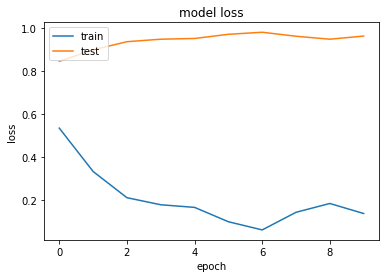

Pesos Guardados!
2022/2022 [==============================] - 6s 3ms/step
Test loss: 1.608475419006409
Test accuracy: 0.7675568743818002
***************



Entrenamiento 2
Train on 5514 samples, validate on 613 samples
Epoch 1/10
5514/5514 [==============================] - 21s 4ms/step - loss: 0.1235 - acc: 0.9661 - val_loss: 1.6693 - val_acc: 0.7700
Epoch 2/10
5514/5514 [==============================] - 21s 4ms/step - loss: 0.1739 - acc: 0.9567 - val_loss: 1.8058 - val_acc: 0.7618
Epoch 3/10
5514/5514 [==============================] - 21s 4ms/step - loss: 0.1947 - acc: 0.9539 - val_loss: 1.6574 - val_acc: 0.7406
Epoch 4/10
5514/5514 [==============================] - 21s 4ms/step - loss: 0.0887 - acc: 0.9790 - val_loss: 1.4632 - val_acc: 0.7863
Epoch 5/10
5514/5514 [==============================] - 21s 4ms/step - loss: 0.0735 - acc: 0.9826 - val_loss: 1.6244 - val_acc: 0.7586
Epoch 6/10
5514/5514 [==============================] - 21s 4ms/step - loss: 0.1457 - acc: 0.9661 - val_lo

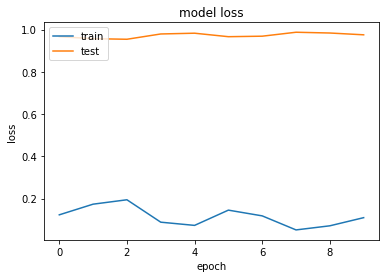

Pesos Guardados!
2022/2022 [==============================] - 6s 3ms/step
Test loss: 2.1209165822046936
Test accuracy: 0.7561819980217607
***************



In [25]:
#Entreno el modelo

#Al final de cada entrenamiento guardo los mejores pesos
numeroEntrenamientos = 2

#ciclos en los cuales evaluo los datos de entrenamiento para hallar los mejores pesos
numeroEpocas = 10

#ver datos entrenamiento
print("Int: ", train_X.shape)
print("Out: ", train_label.shape)

for i in range(numeroEntrenamientos):     
    print()   
    print()
    print("Entrenamiento " + str(i + 1))

    history = pre_trained_model.fit(
        train_X, train_label, 
        batch_size=64, # cantidad de imágenes que se toman a la vez en memoria
        epochs=numeroEpocas,        
        verbose=1,
        validation_data=(valid_X, valid_label)
        )
        
    plot_history(history)
    modeloTrasnferenciaConocimiento.GuardarPesosModelo()
    
    test_eval = pre_trained_model.evaluate(X_test, y_test, verbose=1)
    print('Test loss:', test_eval[0])
    print('Test accuracy:', test_eval[1])
    print("***************")    
    print()

In [26]:
modeloCargadoTransferenciaConocimiento = modeloTrasnferenciaConocimiento.CargarModeloGuardado(True)

Lectura del Json del modelo correcta
<class 'str'>
Modelo Cargado!
Pesos Cargados!
Modelo compilado!


In [27]:
#valido el modelo
test_eval = modeloCargadoTransferenciaConocimiento.evaluate(X_predic, y_predic, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

996/996 [==============================] - 4s 4ms/step
Test loss: 2.10583562161549
Test accuracy: 0.7530120481927711


In [0]:
url = 'https://www.aprendemachinelearning.com/clasificacion-de-imagenes-en-python/'